<a href="https://colab.research.google.com/github/BrazilianKing/Food-Sales-Predictions/blob/main/Project_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [24]:
filename = '/content/drive/MyDrive/excel downloads/sales_predictions.csv'
df = pd.read_csv(filename) 
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# 1) How many rows and columns?

df.shape

(8523, 12)

In [6]:
# 2) What are the datatypes of each variable?

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# 3) Are there duplicates? If so drop any duplicates

df.duplicated().any()

False

In [8]:
df.duplicated().sum()

0

In [9]:
# 4) Identify missing values.

df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

# I was going to go with the above code but then realized I could have easily missed those "true" values so I went with this code instead

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
# I decided to use the mean for the missing values on the weight and mode for outlet size 

mean_weight = df['Item_Weight'].mean()

df['Item_Weight'].fillna(value = mean_weight, inplace = True)


In [12]:
mode_size = df['Outlet_Size'].mode()
# this code is not working when using (value = mode_size)

df['Outlet_Size'].fillna('Medium', inplace = True)

In [13]:
# 6) Confirm that there are no missing values after addressing them.

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [15]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df.replace(['LF', 'reg', 'low fat'], ['Low Fat', 'Regular', 'Low Fat'], inplace = True)

In [17]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# Part 3

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each

# Histogram:

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

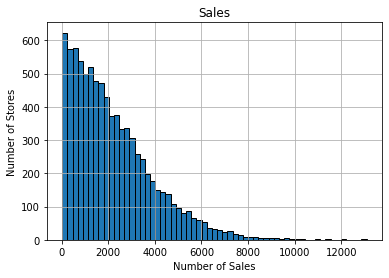

In [26]:
df['Item_Outlet_Sales'].hist(bins = 'auto', grid = True, edgecolor = 'black' )

plt.xlabel('Number of Sales')
plt.ylabel('Number of Stores')
plt.title('Sales');

**This Histogram is showing us that there are a substantial amount of stores that yield zero sales while there were some stores that had up to 10k plus.**

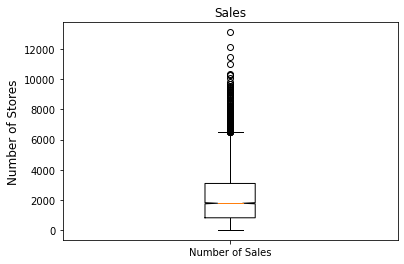

In [29]:
Sales = df['Item_Outlet_Sales']
plt.boxplot([Sales], labels = ['Number of Sales'], notch = True)
plt.title('Sales', fontsize = 12)
plt.ylabel('Number of Stores', fontsize = 12);

**This boxplot shows that there are a large amount of outliers.**



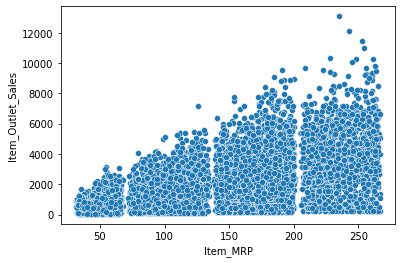

In [37]:
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales');

**Based upon this scatterplot it is very clear that there is a strong positive correlation between 'Item_MRP' & 'Item_Outlet_Sales'**

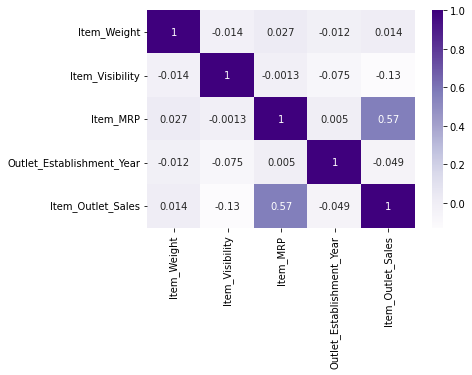

In [44]:
sns.heatmap(df.corr(), cmap = 'Purples', annot = True);

**This heatmap shows that there is a moderate correlation between 'Item_MRP' & 'Item_Outlet_Sales' while all of the other correlations are low.**
